In [1]:
import sympy as sp
import numpy as np
from sympy.functions import re
from sympy.plotting import plot as spplt

import scipy.optimize as sciop 


import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_subplot(111)

x = sp.Symbol('x')
y = sp.Symbol('y')
z, vt = sp.symbols('z vt')
#from sympy.abc import x, y, z, a, b

# wenn eine erhöhte Genauigkeit erforderlich ist bei nsolve:
# damit prec hoch gesetzt werden kann
import mpmath
mpmath.mp.dps = 25

Lösung nsolve as_ numer_denom:
Matrix([[14.67068466286635243629155]])

Lösung solve:
[(6.81631445961855,), (14.6706846628664,), (9.25650043875755 - 3.78380755685081*I,), (9.25650043875755 + 3.78380755685081*I,)]

Lösung solveset:
{6.81631445961857, 14.6706846628663, 9.25650043875756 - 3.78380755685079*I, 9.25650043875756 + 3.78380755685079*I}

Estimates [-1.e+00 -1.e-01 -1.e-02 -1.e-03 -1.e-04 -1.e-05 -1.e-06 -1.e-07 -1.e-08
  1.e+00  1.e-01  1.e-02  1.e-03  1.e-04  1.e-05  1.e-06  1.e-07  1.e-08]
Lösungen für Startwerte mit nsolve as_ numer_denom:


Lösungen:
[6.81631445961855, 14.670684662866352]


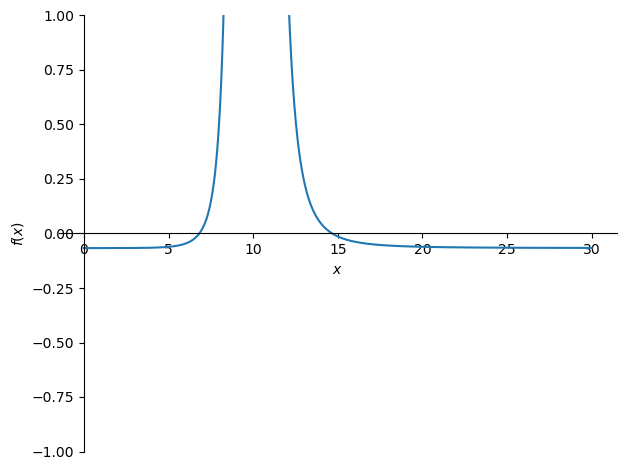

In [2]:
# erhöhte Genauigkeit: anzahlGleichungen = 4
anzahlGleichungen = 1

"""
Tipps:
Lösungen einschränken:
    assumptions:
    x = Symbol('x', real = True, nonzero=True) #nonzero=True means "real and not zero", whereas zero=False just means "not zero".
    mögliche Assumptions: https://docs.sympy.org/latest/modules/core.html
    imaginary
    complex
    real
    integer
    even 
    odd
    prime
    composite (nicht Primzahl)
    nonzero
    rational
    negative
    positive
    nonnegative
    ...
    
    sp.solveset(x**2 + 1, x, domain=sp.S.Reals) #default: sp.S.Complexes

    mit Ungleichungen
        eq1 = 3*x**2-1
        eq2 = x<10
        res1 = sp.solve([eq1, eq2], [x], prec = 10)
        print(res1)


in einer Gleichung alle Variabeln durch z.B. eine Zahl ersetzen: 
    expr=sin(x)*sin(x)+cos(x)*cos(x)
    expr.subs(x,a)

"""

def runden(zahl, stellen = 4):
    zehnerexponent = "{:e}".format(zahl).split('e')[1]
    return round(zahl, -(int(zehnerexponent) - stellen))

if anzahlGleichungen == 1:
    c0=0.0341
    pK = 6.46
    K = 0.067
    
    eq = (2*x)**2/(10-x)/(30-3*x)**3 - K 
    
    
    estimate = [1E-7]

    try:
        res = sp.nsolve([eq],[x],estimate, maxsteps = 100)
        print("Lösung nsolve as_ numer_denom:")
        print(res)
        print()
    except:
        print("nsolve ging nicht")
           
    
    res1 = sp.solve([eq], [x], prec = 15)
    print("Lösung solve:")
    print(res1)
    print()
    
    res2 = sp.solveset(eq, x)
    print("Lösung solveset:")
    print(res2)
    print()



    loesungen = []
    logs = np.linspace(0,8,9)
    estimates = np.concatenate((-10**-logs, 10**-logs)) 
    print("Estimates", estimates)
    print("Lösungen für Startwerte mit nsolve as_ numer_denom:")
    for estimate in estimates:
        try:
            res = sp.nsolve([eq],[x],estimate, maxsteps = 100)
            
            if float(res[0]) not in loesungen:
                loesungen.append(float(res[0]))
            #print("Estimate", estimate, "Lösung",float(res[0]))
        except:
            print("Keine Lösung für estimate = ", estimate)
    print("\n\nLösungen:")
    print(loesungen)
    
    #sp.plot(eq)
    sp.plot(eq,(x,0,30), ylim=[-1,1])
    #sp.plot(eq, (x,-1,5), ylim=[-.0005,0.0005])


    
if anzahlGleichungen == 2:
    #H2S in wässriger Lösung


    
    
    eq1 = x * (y+2*x)**2 - 5.02*10**-6
    eq2 = (y+2*x)*(y)-10**-14

    estimates = [0.001,0.001]
    try:
        res5 = sp.nsolve([eq1.as_numer_denom()[0],eq2.as_numer_denom()[0]],[x,y],estimates,modules=['mpmath'])
        print("Lösung nsolve as_ numer_denom:")
        print(res5)
        print()
    except:
        print("nsolve ging nicht")
           
    
    res6 = sp.solve([eq1, eq2], [x,y], prec = 15)
    print("Lösung solve:")
    print(res6)
    print()
    

if anzahlGleichungen == 3:
    eq1 = 8.71E-8 - (x-y)*(x+y+z)/(0.2-x)
    eq2 = 1.26E-12 - y*(x+y+z)/(x-y)
    eq3 = 1e-14 - z*(x+y+z)
    
    # wenn zeroDivision Error: estimates leicht variieren. Irgend eine Gleichung wird dann durch Null geteilt
    estimates = [0.001,0.002,0.003]
    res5 = sp.nsolve([eq2.as_numer_denom()[0],eq3.as_numer_denom()[0],eq1.as_numer_denom()[0]],[x,y,z],estimates,modules=['mpmath'])
    print("Lösung nsolve as_ numer_denom:")
    print(res5)
    print()
    
    res6 = sp.nsolve([eq2,eq3,eq1],[x,y,z],estimates,maxsteps = 100)
    print("Lösung nsolve OHNE as_ numer_denom:")
    print(res6)
    print()
    
    """
    # dauert endlos
    res7 = sp.solve([eq1.as_numer_denom()[0], eq2.as_numer_denom()[0], eq3.as_numer_denom()[0]], [x,y,z])
    print("Lösung solve:")
    print(res7)
    print()
    """


if anzahlGleichungen == 4:

    v,w,x,y = sp.symbols("v w x y")
    
    co2 = 0.0004 #atm
    h2co3 = co2 * 3.4E-2
    
    
    eq1 = (v-w)*(v+w+y)/h2co3 - 10**-6.46
    eq2 = (x+w)*(v+w+y)/(v-w) - 10**-10.4
    eq3 = x * (x+w) - 3.36E-9
    eq4 = y*(v+w+y) - 10**-14
    # geht nicht, da u-w genau 0 ergibt:
    estimate = [1E-7,1E-7,1E-7,1E-7]
    
    # Schätzwert für v und w müssen  verschieden sein:
    estimate = [1E-7,2E-7,1E-7,1E-7]
    estimate = [0.1,0.09,0.1,0.1]
    
    #so findet nsolve eine andere Lösung:
    # estimate = [0.1,0.09,0.1,0.1]
    res = sp.nsolve([eq1,eq2,eq3,eq4],[v,w,x,y],estimate, maxsteps = 100, prec=20, tol = 1E-15)
    # wenn das nicht klappt bzw. findet Lösung schneller: 
    # res = sp.nsolve([eq1.as_numer_denom()[0],eq2.as_numer_denom()[0],eq3.as_numer_denom()[0],eq4.as_numer_denom()[0]],[v,w,x,y],estimate, maxsteps = 100, prec=20, tol = 1E-15)
    
    print("res",res,"\n")
    
    v2,w2,x2,y2 = res
    hco3 = v2-w2
    co3 = x2 + w2
    ca = x2
    oh = y2
    h3o = y2+v2+w2
    
    spezies = ["h2co3", "hco3-", "co3--", "ca++", "oh-", "h3O+ "]
    werte = [h2co3, hco3, co3, ca, oh, h3o]
    for i in range(len(spezies)):
        print("["+spezies[i]+"] = ", werte[i])
    print()
    
    print("kontrollen")
    print("pKs1",-sp.log(hco3*h3o/h2co3)/sp.log(10.0))
    print("pKs2",-sp.log(co3*h3o/hco3)/sp.log(10.0))
    print("KH",h2co3/co2)
    print("KL", ca * co3)
    print("KW", oh * h3o)

#bild1 = spplt(eq1, title="eq1(x,y)")  


#bild1 = plt.plot3d(eq1, title="eq1(x,y)") 
